# Chapter 4 NumPy 기본: 배열과 벡터 연산

- NumPy는 Numerical Python의 줄임말, 파이썬에서 산술 계산을 위한 가장 중요한 필수 패키지 중 하나
- 계산 과학을 위한 대부분의 패키지는 NumPy의 배열 객체를 데이터 교환을 위한 공통 언어처럼 사용

- NumPy에서 제공하는 것들  
    - 효율적인 다차원 배열인 `ndarray`는 빠른 배열 계산과 유연한 `브로드캐스팅` 기능을 제공
    - 반복문을 작성할 필요 없이 전체 데이터 배열을 빠르게 계산할 수 있는 표준 수학 함수
    - 배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일을 다루는 도구
    - 선형대수, 난수 생성기, 푸리에 변환 가능
    - C, C++, 포트란으로 작성한 코드를 연결할 수 있는 C API

- NumPy의 장점
    - NumPy는 내부적으로 데이터를 다른 내장 파이썬 객체와 구분된 연속된 메모리 불록에 저장한다. 
    - NumPy의 각종 알고리즘은 모두 C로 작성되어 타입 검사나 다른 오버헤드 없이 메모리를 직접 조작할 수 있다.
    - NumPy 배열은 또한 내장 파이썬의 연속된 자료형들보다 훨씬 더 적은 메모리를 사용한다.
    - NumPy 연산은 파이썬 반복문을 사용하지 않고 전체 배열에 대한 복잡한 계싼을 수행할 수 있다.

> 성능 차이 확인 : 백만 개의 정수를 저장하는 NumPy 배열과 파이썬 리스트 비교

In [3]:
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

In [19]:
# 각각의 배열과 리스트 원소에 2를 곱하기
%time for _ in range(10) : my_arr2 = my_arr * 2
%time for _ in range(10) : my_list2 = [x*2 for x in my_list]

Wall time: 29.9 ms
Wall time: 833 ms


## 4.1 NumPy ndarray : 다차원 배열 객체

- ndarray 
    - N차원의 배열 객체이며 NumPy의 핵심
    - 대규모 데이터 집합을 담을 수 있는 빠르고 유연한 자료구조.
    - 배열은 스칼라 원소간의 연산에 사용하는 문법과 비슷한 방식을 사용해 전체 데이터 블록에 수학적인 연산을 수행할 수 있게 해줌

In [30]:
import numpy as np     # numpy import convention임

data = np.random.randn(2,3)
data

array([[ -7.10188957, -17.59088192,  -1.09342313],
       [  3.4775524 ,   6.38532323,  11.47541335]])

- ndarray 객체에 스칼라 연산을 시행하면 모든 원소에 대해 연산을 수행해 줌

In [31]:
data * 10

array([[ -7.10188957, -17.59088192,  -1.09342313],
       [  3.4775524 ,   6.38532323,  11.47541335]])

In [32]:
data + data

array([[-1.42037791, -3.51817638, -0.21868463],
       [ 0.69551048,  1.27706465,  2.29508267]])

- ndarray의 모든 원소는 같은 자료형이어야 함
- np.shape : 배열의 각 차원의 크기를 알려주는 `튜플`
- np.dtype : 배열에 저장된 자료형을 알려주는 `객체`

In [35]:
data.shape

(2, 3)

In [38]:
data.dtype

dtype('float64')

### 4.1.1 ndarray 생성하기

- array 함수
    - 순차적인 객체 (다른 배열도 포함하여)를 넘겨 받음
    - 넘겨받은 데이터가 들어 있는 새로운 NumPy 배열을 생성

In [43]:
data1 = [6,7.5,8,0,1]
data2 = [[1,2,3,4],
         [5,6,7,8]]

arr1 = np.array(data1)
arr2 = np.array(data2)

In [44]:
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [45]:
arr2           # 같은 길이를 가지는 리스트를 내포하는 순차 데이터는 다차원 배열로 변환 가능.

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [48]:
arr2.ndim      # ndim을 통하여 2차원 형태로 생성됐음을 확인

2

In [49]:
arr2.shape

(2, 4)

#### 배열 생성 함수

<details>
<summary>배열 생성 함수</summary>
<div markdown="1">

|함수|설명|
|:--|:--|
|array|입력 데이터(리스트, 튜플, 배열 또는 다른 순차형 데이터)를 ndarray로 변환하며 dtype을 명시하지 않는 경우 자료형을 추론하여 저장한다. 기본적으로 입력 데이터는 `복사`된다.|
|asarray|입력 데이터를 ndarray로 변환하지만 입력 데이터가 이미 ndarray일 경우 복사가 일어나지 않는다.|
|arange|내장 range 함수와 유사하지만 리스트대신 ndarray를 반환한다.|    
|ones|`주어진 dtype과 모양`을 가지는 배열을 생성하고 내용을 모두 1로 초기화한다.|
|ones_like|`주어진 배열`과 동일한 모양과 dtype을 가지는 배열을 새로 생성하여 내용을 모두 1로 초기화한다.|
|zeros|`주어진 dtype과 모양`을 가지는 배열을 생성하고 내용을 모두 0으로 초기화한다.|
|zeros_like|`주어진 배열`과 동일한 모양과 dtype을 가지는 배열을 새로 생성하여 내용을 모두 0으로 초기화한다.|
|empty, empty_like|메모리를 할당하여 새로운 배열을 생성하지만 ones나 zeros처럼 값을 초기화하지 않는다.|
|full, full_lik|인자로 받은 dtype과 배열의 모양을 가지는 배열을 생성하고 인자로 받은 값으로 배열을 채운다.|
|eye, identity| N x N 크기의 단위행렬을 생ㅅ어한다 (좌상단에서 우하단을 잇는 대각선은 1로 채워지고 나머지는 0으로 채워진다.)|
    
</div>
</details>

In [54]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
np.ones((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [56]:
np.empty((2,3,2))

array([[[1.10031594e-311, 1.10031594e-311],
        [1.10031594e-311, 1.26974871e-321],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

In [58]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### 4.1.2 ndarray의 dtype

- dtype
    - ndarray가 메모리에 있는 특정 데이터를 해석하기 위해 필요한 정보 (또는 `메타데이터`)를 담고 있는 `특수한 객체`다.
    - dypte이 있어서 NumPy가 강력하면서도 유연한 도구가 될 수 있다고 함.

In [60]:
arr1 = np.array([1,2,3], dtype = np.float64)
arr2 = np.array([1,2,3], dtype = np.int32)

print('''
dtype of arr1 : {0}
dtype of arr2 : {1}'''.format(arr1.dtype, \
                              arr2.dtype))


dtype of arr1 : float64
dtype of arr2 : int32


- np.astype()
    - np.ndarray.astype 메서드를 사용해서 배열의 dtype을 다른 형으로 명시적으로 변환 (또는 캐스팅) 가능하다.

In [3]:
arr = np.array([1,2,3,4,5])
float_arr = arr.astype(np.float64)

print('''
dtype of arr : {0}
dtype of float_arr : {1}'''.format(arr.dtype, \
                                   float_arr.dtype))


dtype of arr : int32
dtype of float_arr : float64


#### NumPy 자료형

<details>
<summary>NumPy 자료형</summary>
<div markdown="1">

|자료형|자료형 코드|설명|
|:--|:--|:--|
|int8, uint8|i1, u1|부호가 있는 8비트(1바이트) 정수형과 부호가 없는 8비트 정수형|
|int16, uint16|i2, u2|부호가 있는 16비트 정수형과 부호가 없는 16비트 정수형|
|int32, uint32|i4, u4|부호가 있는 32비트 정수형과 부호가 없는 32비트 정수형|
|int64, uint64|i8, u8|부호가 있는 64비트 정수형과 부호가 없는 64비트 정수형|
|float16|f2|반정밀도 부동소수점|
|float32|f4 또는 f|단정밀도 부동소수점. C언어의 float형과 호환|
|float64|f8 또는 d|배정밀도 부동소수점. C언어의 double형과 파이썬의 float 객체와 호환|
|float129|f16 또는 g|확장정밀도 부동소수점|
|complex64,  
 complex128,  
 complex256|c8, c16, c32| 각각 2개의 32,64,128비트 부동소수점형을 가지는 복소수|
|bool|?|True와 False 값을 저장하는 불리언형|
|object|O|파이썬 객체형|
|string_|S|고정 길이 아스키 문자열형(각 문자는 1바이트). 길이가 10인 문자열 dtype은 S10이 된다.|
|unicode_|U|고정 길이 유니코드형(플랫폼에 따라 문자별 바이트 수가 다르다). string_형과 같은 형식을 쓴다(예:U10).|
    
</div>
</details>

> 숫자 형식의 문자열을 담고 있는 배열이 있다면 astype을 사용하여 숫자로 변환할 수 있다.

In [73]:
numeric_strings = np.array(['1.25','-9.634','42'], dtype = np.string_)
numeric_strings

array([b'1.25', b'-9.634', b'42'], dtype='|S6')

In [83]:
# np.float64와 파이썬 float 객체는 호환 가능함. 따라서 아래 두 코드는 같은 값을 반환
print(numeric_strings.astype(np.float64))
print(numeric_strings.astype(float))

[ 1.25  -9.634 42.   ]
[ 1.25  -9.634 42.   ]


### 4.1.3 NumPy 배열의 산술 연산

- 배열의 중요한 특징은 for 문을 작성하지 않고 데이터를 일괄 처리할 수 있다는 점. 이를 `벡터화`라고 함.
- 같은 크기의 배열 간의 산술 연산은 배열의 각 원소 단위로 적용됨.

In [105]:
arr = np.array([[1.,2.,3.],
                [4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [106]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [107]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [108]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

- 같은 크기를 가지는 배열 간의 비교 연산은 불리언 배열을 반환함.

In [111]:
arr2 = np.array([[0.,4.,1.],
                 [7.,2.,12.]])
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### 4.1.4 색인과 슬라이싱 기초

- 1차원 배열의 색인과 슬라이싱은 표면적으로는 파이선의 리스트와 유사하게 동작함
- 배열 조각에 스칼라값을 대입하면 해당 값이 선택 영역 전체로 전파 (또는 `브로드캐스팅`)됨.

In [117]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
arr[5:8]

array([5, 6, 7])

In [120]:
arr[5:8] = 12
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

- 리스트와의 **중요한** 차이점은 배열 조각은 원본 배열의 `뷰`라는 점.
    - 즉, 데이터는 복사되지 않고 뷰에 대한 변경은 그대로 원본 배열에 반영된다.
    - NumPy는 대용량의 데이터 처리를 염두에 두고 설계되었기 때문에 성능과 메모리 문제를 피하기 위해 데이터 복사를 피한다.

In [122]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [123]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [124]:
# 단순히 [:]로 슬라이스를 하면 배열의 모든 값을 할당한다.
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

> 만약에 뷰 대신 ndarray 슬라이스의 복사본은 얻고 싶다면 arr[5:8].copy()를 사용해서 명시적으로 배열을 `복사`해야한다.

- 2차원 배열 색인

In [129]:
arr2d = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

In [130]:
arr2d[2]

array([7, 8, 9])

In [131]:
arr2d[0][2]

3

In [132]:
arr2d[0,2]

3

- 3차원 배열 색인

In [141]:
arr3d = np.array([[[1,2,3],[4,5,6]],
                  [[7,8,9],[10,11,12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [142]:
# arr3d[0]은 2X3 크기의 배열
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [145]:
#arr3d[0]에는 스칼라값과 배열 모두 대입할 수 있다.
old_values = arr3d[0].copy()

arr3d[0] = 42
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [147]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [151]:
arr3d[1,0,2]

9

In [152]:
arr3d[1][0][2]

9

#### 슬라이스로 선택하기

In [154]:
arr = np.array([0,1,2,3,4,64,64,64,8,9])
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [160]:
arr2d = np.array([[1,2,3],
                  [4,5,6],
                  [7,8,9]])

In [161]:
# 첫번째 ~ 두번째 로우까지 슬라이싱
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [163]:
# 첫번째 ~ 두번째 로우까지 슬라이싱 + 두번째 ~ 세번째 컬럼 슬라이싱
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [164]:
# 첫번째 컬럼의 값만 가지고 싶을 때
arr2d[:, :1]

array([[1],
       [4],
       [7]])

### 4.1.5 불리언값으로 선택하기

In [168]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)      # 7X4 ndarray 배열을 표준 정규분포로부터 생성

print('''
names : {0}

data : {1}'''.format(names, data))


names : ['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']

data : [[ 1.33704026  0.14174274 -1.59550218  0.38268523]
 [-0.97615169 -0.44986393 -0.18409171  0.40600197]
 [-1.01815827 -1.72230544  0.61339159 -1.52596255]
 [ 0.66385402 -1.03244792 -0.92960303  1.42978801]
 [-0.10154898 -0.7749967   1.50807214  1.10975645]
 [-1.07416771 -0.02281652  1.37048618  2.35115012]
 [-0.72971029  0.98322299  0.82856976  0.94091838]]


In [170]:
data[names == "Bob"]   # 첫 번째와 네 번째 로우가 반환됨

array([[ 1.33704026,  0.14174274, -1.59550218,  0.38268523],
       [ 0.66385402, -1.03244792, -0.92960303,  1.42978801]])

In [172]:
data[names == "Bob", 2:]   # 첫 번째와 네 번째 로우에서 3~4번째 컬럼이 반환

array([[-1.59550218,  0.38268523],
       [-0.92960303,  1.42978801]])

In [174]:
data[names != "Bob"]   # Bob이 아닌 로우를 반환
#data[~(names == "Bob")]  # 위 표현과 동치

array([[-0.97615169, -0.44986393, -0.18409171,  0.40600197],
       [-1.01815827, -1.72230544,  0.61339159, -1.52596255],
       [-0.10154898, -0.7749967 ,  1.50807214,  1.10975645],
       [-1.07416771, -0.02281652,  1.37048618,  2.35115012],
       [-0.72971029,  0.98322299,  0.82856976,  0.94091838]])

In [176]:
cond = names == "Bob"
data[~cond]

array([[-0.97615169, -0.44986393, -0.18409171,  0.40600197],
       [-1.01815827, -1.72230544,  0.61339159, -1.52596255],
       [-0.10154898, -0.7749967 ,  1.50807214,  1.10975645],
       [-1.07416771, -0.02281652,  1.37048618,  2.35115012],
       [-0.72971029,  0.98322299,  0.82856976,  0.94091838]])

- &(and)나 |(or) 같은 논리 연산자를 사용하는 방법
- 파이썬 예약어인 and와 or은 불리언 배열에서는 사용할 수 없다. 대신 & 와 | 를 사용한다.

In [178]:
mask = (names == "Bob") | (names == "Will")
mask

array([ True, False,  True,  True,  True, False, False])

In [179]:
data[mask]

array([[ 1.33704026,  0.14174274, -1.59550218,  0.38268523],
       [-1.01815827, -1.72230544,  0.61339159, -1.52596255],
       [ 0.66385402, -1.03244792, -0.92960303,  1.42978801],
       [-0.10154898, -0.7749967 ,  1.50807214,  1.10975645]])

In [180]:
# data에 저장된 모든 음수를 0으로 대입
data[data < 0] = 0
data

array([[1.33704026, 0.14174274, 0.        , 0.38268523],
       [0.        , 0.        , 0.        , 0.40600197],
       [0.        , 0.        , 0.61339159, 0.        ],
       [0.66385402, 0.        , 0.        , 1.42978801],
       [0.        , 0.        , 1.50807214, 1.10975645],
       [0.        , 0.        , 1.37048618, 2.35115012],
       [0.        , 0.98322299, 0.82856976, 0.94091838]])

In [181]:
# 1차원 불리언 배열을 사용해 필요한 로우의 값을 대체하기
data[names != "Joe"] = 7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 0.        , 0.40600197],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.37048618, 2.35115012],
       [0.        , 0.98322299, 0.82856976, 0.94091838]])

### 4.1.6 팬시 색인

- $팬시 색인^{\text{fancy indexing}}$은 정수 배열을 사용한 색인을 설명하기 위해 NumPy에서 차용한 단어
- 팬시 색인은 슬라이싱과는 달리 선택된 데이터를 `새로운 배열`로 복사한다.

In [3]:
arr = np.empty((8,4))

for i in range(8) :
    arr[i] = i
    
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

> 특정한 순서로 로우를 선택하고 싶다면 원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 넘기면 됨

In [4]:
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [5]:
arr[[-1,-5,-3]]    # 음수로 인덱싱 할 수 있음

array([[7., 7., 7., 7.],
       [3., 3., 3., 3.],
       [5., 5., 5., 5.]])

- 다차원 색인 배열 

In [190]:
arr = np.arange(32).reshape((8,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [192]:
arr[[1,5,7,2], [0,3,1,2]]     # (1,0), (5,3), (7,1), (2,2)에 대응하는 원소들이 선택됨

array([ 4, 23, 29, 10])

In [195]:
arr[[1,5,7,2]][:,[0,3,1,2]]   # 해당하는 row의 column 위치만 바꾸고 싶은 경우

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 4.1.7 배열 전치와 축 바꾸기

- 배열 전치는 데이터를 `복사하지 않고` 데이터의 모양이 바뀐 뷰를 반환하는 특별한 기능.
- ndarray는 transpose 메서드와 T라는 이름의 특수한 속성을 가지고 있음.

In [197]:
arr = np.arange(15).reshape((3,5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [199]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [202]:
arr.transpose()

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

- 행렬의 내적은 np.dot을 이용해서 구할 수 있다.

In [205]:
arr = np.random.randn(6,3)
arr

array([[ 1.06793397,  1.80134596, -1.92495752],
       [-0.97583389, -0.43453951,  0.50588564],
       [-0.08501478, -0.38234601, -0.93944961],
       [ 1.88293739, -0.76399729, -0.28459296],
       [-0.70415052,  1.47916783,  0.31805895],
       [ 0.4275599 , -0.11812187, -1.60369168]])

In [206]:
np.dot(arr.T, arr)

array([[ 6.32405087, -0.15035804, -3.91502712],
       [-0.15035804,  6.36544245, -2.45082507],
       [-3.91502712, -2.45082507,  7.59792895]])

- 다차원 배열의 경우
    - transpose 메서드는 튜플로 축 번호를 받아서 치환
    - swapaxes 메서드는 두 개의 축 번호를 받아서 배열을 뒤바꾼다.
    - 두 메서드 모드 데이터를 복샇자ㅣ 않고 원래 데이터에 대한 뷰를 반환

> np.ndarray.tranpose 메서드

In [208]:
arr = np.arange(16).reshape((2,2,4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [213]:
arr.transpose((1,0,2))     # 첫 번재와 두 번째 축 순서가 뒤바뀌었고 마지막 축은 그대로 남았다.

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [214]:
arr.transpose((1,0,2)).shape

(2, 2, 4)

> np.ndarray.swapaxes 메서드

In [215]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [216]:
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

In [227]:
arr.swapaxes(1,2).shape

(2, 4, 2)

## 4.2 유니버설 함수: 배열의 각 원소를 빠르게 처리하는 함수

- ufunc라고 불리기도 하는 유니버설 함수는 ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수
- 유니버설 함수는 하나 이상의 스칼라값을 받아 하나 이상의 스칼라 결괏값을 반환하는 간단한 함수를 고속으로 수행할 수 있는 벡터화된 래퍼 함수

> 단항 유니버설 함수 : 1개의 인자를 취하는 유니버설 함수

In [5]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [7]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

> 이항 유니버설 함수 : 2개의 인자를 취해서 단일 배열을 반환하는 함수

In [8]:
x = np.random.randn(8)
y = np.random.randn(8)

print('''
x : {0}
y : {1}'''.format(x, y))


x : [-0.57982553 -0.29098033  0.51438784  0.17559767 -0.64121032  1.21700768
 -1.05393356 -0.74663132]
y : [-0.64806039  1.46575746  0.79195919  0.0943634   0.19426877  0.00892577
  0.98306866 -0.525073  ]


In [10]:
np.maximum(x, y)   # x와 y의 원소별로 가장 큰 값을 반환한다.

array([-0.57982553,  1.46575746,  0.79195919,  0.17559767,  0.19426877,
        1.21700768,  0.98306866, -0.525073  ])

> 여러 개의 배열을 반환하는 유니버설 함수도 있다.

In [9]:
arr = np.random.randn(7) * 5

# np.modf : 분수를 받아서 몫과 나머지를 함께 반환하는 유니버설 함수
remainder, whole_part = np.modf(arr)    

print('''
arr : {0}
remainder : {1}
whole_part : {2}'''.format(arr, \
                           remainder, \
                           whole_part))


arr : [ 4.62235602 -5.5129229  -1.19507971  3.77206262  9.84653942  8.93968007
 -4.32909583]
remainder : [ 0.62235602 -0.5129229  -0.19507971  0.77206262  0.84653942  0.93968007
 -0.32909583]
whole_part : [ 4. -5. -1.  3.  9.  8. -4.]


> 유니버설 함수는 선택적으로 out 인자를 취해 계산 결과를 따로 저장할 수도 있다.

In [10]:
arr 

array([ 4.62235602, -5.5129229 , -1.19507971,  3.77206262,  9.84653942,
        8.93968007, -4.32909583])

In [11]:
np.sqrt(arr)

<ipython-input-11-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([2.14996652,        nan,        nan, 1.94217986, 3.1379196 ,
       2.98992978,        nan])

In [12]:
np.sqrt(arr, out = arr)

<ipython-input-12-66d13d92b086>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr, out = arr)


array([2.14996652,        nan,        nan, 1.94217986, 3.1379196 ,
       2.98992978,        nan])

In [13]:
arr

array([2.14996652,        nan,        nan, 1.94217986, 3.1379196 ,
       2.98992978,        nan])

#### 단항 유니버설 함수

<details>
<summary>단항 유니버설 함수</summary>
<div markdown="1">

|함수|설명|
|:--|:--|
|abs, fabs|각 원소(정수, 부동소수점수, 복소수)의 절대값을 구한다. 복소수가 아닌 경우에는 빠른 연산을 위해서 fabs를 사용한다.|
|sqrt|각 원소의 제곱근을 계산한다. arr ** 0.5와 동일하다.|
|square|각 원소의 제곱을 계산한다. arr ** 2와 동일하다.|
|exp|각 원소에서 지수 $e^{x}$를 계산한다.|
|log, log10, log2, 1og1p|각자 자연로그, 로그 10, 로그 2, 로그 (1+x)|
|sign|각 원소의 부호를 계산한다. 1(양수), 0(영), -1(음수)|
|ceil|각 원소의 소수자리를 올린다. 각 원소의 값보다 같거나 큰 정수 중 가장 작은 정수를 반환한다.|
|floor|각 원소의 소수자리를 내린다. 각 원소의 값보다 작거나 같은 정수 중 가장 큰 수를 반환한다.|
|rint|각 원소의 소수자리를 반올림한다. dtype은 유지된다.|
|modf|각 원소의 몫과 나머지를 각각의 배열로 반환한다.|
|isnan|각 원소가 숫자가 아닌지(NaN, Not a Number)를 나타내는 불리언 배열을 반환한다.|
|isfinite, isinf|각각 배열의 각 원소가 유한한지(non-inf, non-NaN) 무한한지 나타내는 불리언 배열을 반환한다.|
|cos, cosh, sin, sinh, tan, tanh|일반 삼각함수와 쌍곡삼각함수|
|arccos, arccosh, arcsin, arcsinh, arctan, arctanh|역삼각함수|
|logical_not|각 원소의 논리 부정(not) 값을 계산한다. ~arr과 동일하다.|
 
    
</div>
</details>

#### 이항 유니버설 함수

<details>
<summary>이항 유니버설 함수</summary>
<div markdown="1">

|함수|설명|
|:--|:--|
|add|두 배열에서 같은 위치의 원소끼리 더한다.|
|subtract|첫 번째 배열의 원소에서 두 번째 배열의 원소를 뺀다.|
|multiply|배열의 원소끼리 곱한다.|
|divide, floor_divide|첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈다. floor_divide는 몫만 취한다.|
|power|첫 번째 배열의 원소를 두 번째 배열의 원소만큼 제곱한다.|
|maximum, fmax|각 배열의 두 원소 중 큰 값을 반환한다. fmax는 NaN을 무시한다.|
|minimum, fmin|각 배열의 두 원소 중 작은 값을 반환한다. fmin은 NaN을 무시한다.|
|mod|첫 번째 배열의 원소를 두 번째 배열의 원소로 나눈 나머지를 구한다.|
|copysign|첫 번째 배열의 원소의 기호를 두 번째 배열의 원소의 기호로 바꾼다.|
|greater, greater_equal, less, less_equal, equal, not_equal|각각 두 원소 간의 >,>=,<,<=,==,!= 비교 연산 결과를 불리언 배열로 반환한다.|
|logical_and, logical_or, logical_xor| 각각 두 원소 간의 &, \|, ^ 논리 연산 결과를 반환한다.|
 
    
</div>
</details>

## 4.3 배열을 이용한 배열지향 프로그래밍

- NumPy 배열을 사용하면 반목문을 작성하지 않고 간결한 배열 연산을 사용해 많은 종류의 데이터 처리 작업을 할 수 있음
- 벡터화 : 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법
- 벡터화된 배열에 대한 산술 연산은 순수 파이썬 연산에 비해 엄청 빠르다.

> 예) 값이 놓여 있는 그리드에서 $\sqrt{x^2 + y^2}$을 계산한다고 하자.  
> np.meshgrid 함수는 두 개의 1차원 배열을 받아서 가능한 모든 (x,y) 짝을 만들 수 있는 2차원 배열 두 개를 반환한다.

In [14]:
points = np.arange(-5,5, 0.01)   # -5부터 4.99까지 0.01씩 증가하는 값들의 배열

xs, ys = np.meshgrid(points, points)

In [15]:
print('''
xs 

{0}

ys

{1}'''.format(xs, ys))


xs 

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]

ys

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


> 이제 그리드 상의 두 포인트로 간단하게 계산을 적용할 수 있다.

In [16]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

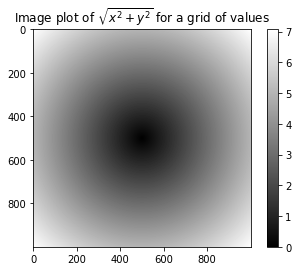

In [17]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap = plt.cm.gray)    # 계산된 값이 들어 있는 2차원 배열로부터 그래프 이미지를 생성하기 위해 matplotlib의 imshow를 사용.
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.show()

### 4.3.1 배열 연산으로 조건절 표현하기

- numpy.where : x if 조건 else y 같은 삼항식의 벡터화된 버전.

In [19]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = np.array([2.1,2.2,2.3,2.4,2.5])
cond = np.array([True,False,True,True,False])

> cond의 값이 true이면 xarr의 값을 취하고 아니면 yarr의 값을 취하고 싶다면 $리스트 표기법 ^{\text{list comprehension}}$을 이용해서 다음처럼 작성할 수 있다.  
> 하지만, 이 방법은 순수 파이썬으로 수행되기 때문에 큰 배열을 빠르게 처리하지 못한다.  
> 또한 다차원 배열에서는 사용할 수 없다.

In [20]:
result = [(x if c else y)
          for x, y, c in zip(xarr,yarr,cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

> np.where 사용하면 간결하게 작성할 수 있다.  
> 두 번째와 세 번째 인자는 배열이 아니어도 상관없다.

In [21]:
# R에서 ifelse(condition, ture-expr, false-expr)과 비슷한 듯.
result = np.where(cond,xarr,yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

> 임의로 생성된 데이터가 들어 있는 행렬이 있고 양수는 모두 2로, 음수는 모두 -2로 바꾸려면 np.where를 사용해서 쉽게 처리할 수 있다.

In [53]:
arr = np.random.randn(4,4)
arr

array([[ 0.62366952,  0.65096018,  0.35128926, -0.3943589 ],
       [ 1.09424784, -0.94064031, -0.76600267,  0.77379267],
       [-0.9508469 , -0.43829238,  1.78315017,  0.53475814],
       [-0.1199491 ,  0.1197789 ,  1.4707972 ,  0.91016491]])

In [54]:
np.where(arr > 0 , 2 , -2)

array([[ 2,  2,  2, -2],
       [ 2, -2, -2,  2],
       [-2, -2,  2,  2],
       [-2,  2,  2,  2]])

> np.where를 사용할 때 스칼라 값과 배열을 조합할 수 있다. 예를 들어 arr의 모든 양수를 2로 바꿀 수 있다.

In [55]:
np.where(arr > 0, 2, arr)

array([[ 2.        ,  2.        ,  2.        , -0.3943589 ],
       [ 2.        , -0.94064031, -0.76600267,  2.        ],
       [-0.9508469 , -0.43829238,  2.        ,  2.        ],
       [-0.1199491 ,  2.        ,  2.        ,  2.        ]])

### 4.3.2 수학 메서드와 통계 메서드

#### 기본 배열 통계 메서드

<details>
<summary>기본 배열 통계 메서드</summary>
<div markdown="1">

|메서드|설명|
|:--|:--|
|sum|배열 전체 혹은 특정 축에 대한 모든 원소의 합을 계산한다. 크기가 0인 배열에 대한 sum 결과는 0이다.|
|mean|산술 평균을 구한다. 크기가 0인 배열에 대한 mean의 결과는 NaN이다.|
|std, var|각각 표준편차(std)와 분산(var)을 구한다. 선택적으로 자유도를 줄 수 있으며 분모의 기본 값은 n이다.|
|min, max|최솟값과 최댓값|
|argmin, argmax|최소 원소의 색인값과 최대 원소의 색인값|
|cumsum|원소의 누적합|
|cumprod|원소의 누적곱|
 
    
</div>
</details>

In [86]:
arr = np.random.randn(5,4)
arr

array([[ 1.61172696,  0.6940278 ,  0.72454442, -1.49380942],
       [-1.35733585, -2.20729911, -0.08650854,  1.18843521],
       [-0.0857529 , -0.07946534,  0.72112769,  0.85950648],
       [ 0.18468959,  0.05734463, -0.20919429, -0.7975721 ],
       [-1.25248766, -1.00163355, -1.83134345, -0.53853114]])

> NumPy의 최상위 함수를 이용하여 계산하는 방법

In [87]:
print('''
np.mean(arr) : {0}
np.sum(arr) : {1}'''.format(np.mean(arr), \
                            np.sum(arr)))


np.mean(arr) : -0.24497652921142565
np.sum(arr) : -4.899530584228513


> 배열의 인스턴트 메서드를 이용하여 계산하는 방법

In [88]:
print('''
arr.mean() : {0}
arr.sum() : {1}'''.format(arr.mean(), \
                          arr.sum()))


arr.mean() : -0.24497652921142565
arr.sum() : -4.899530584228513


> mean이나 sum 같은 함수는 선택적으로 axis 인자를 받아서 해당 axis에 대한 통계를 계산하고 한 차수 낮은 배열을 반환한다.

In [89]:
arr

array([[ 1.61172696,  0.6940278 ,  0.72454442, -1.49380942],
       [-1.35733585, -2.20729911, -0.08650854,  1.18843521],
       [-0.0857529 , -0.07946534,  0.72112769,  0.85950648],
       [ 0.18468959,  0.05734463, -0.20919429, -0.7975721 ],
       [-1.25248766, -1.00163355, -1.83134345, -0.53853114]])

In [90]:
# 컬럼별 합을 구하고 싶을 때 (로우 방향으로 합)
arr.sum(axis = 0)

array([-0.89915986, -2.53702558, -0.68137418, -0.78197097])

In [91]:
# 로우별 평균을 구하고 싶을 때 (컬럼 방향으로 더해서 평균)
arr.mean(axis = 1)

array([ 0.38412244, -0.61567707,  0.35385398, -0.19118304, -1.15599895])

> cumsum과 cumprod는 메서드 중간 계산값을 담고 있는 배열을 반환함

In [94]:
arr = np.array([[0,1,2],               
                [3,4,5],
                [6,7,8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [95]:
arr.cumsum(axis = 0)   # 로우 방향으로 cumsum

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [96]:
arr.cumsum(axis = 1)    # 컬럼 방향으로 cumsum

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]], dtype=int32)

### 4.3.3 불리언 배열을 위한 메서드

- 불리언값은 1(True) 또는 0(False)으로 강제할 수 있다.
- sum 메서드를 실앻아면 불리언 배열에서 True인 원소의 개수를 셀 수 있다.

In [99]:
arr = np.random.randn(100)

(arr > 0).sum()    # 양수인 원소 개수

54

- any와 all 메서드는 불리언 배열에 특히 유용하다.
    - any : 하나 이상의 값이 True인지 검사
    - all : 모든 원소가 True인지 검사

In [103]:
(arr > 0).any()

True

In [104]:
(arr > 0).all()

False

### 4.3.4 정렬

- NumPy 배열도 sort 메서드를 이용해 정리할 수 있다.
- np.sort 메서드는 배열을 직접 변경하지 않고 정렬된 결과를 가지고 있는 복사본을 반환한다.

In [109]:
arr = np.random.rand(6)
arr

array([0.3144941 , 0.27409356, 0.63239049, 0.48037301, 0.55075299,
       0.0962134 ])

In [110]:
arr.sort()
arr

array([0.0962134 , 0.27409356, 0.3144941 , 0.48037301, 0.55075299,
       0.63239049])

> 다차원 배열의 정렬은 sort 메서드에 넘긴 축의 값에 따라 1차원 부분을 정렬함.

In [24]:
arr = np.random.randn(5,3)
arr

array([[-0.00782514,  0.86006203, -1.1197945 ],
       [ 0.33596323, -1.60704173,  1.05236765],
       [-0.13614696, -1.04340672,  0.76813822],
       [ 0.12613771,  2.84593011, -0.01082351],
       [ 2.14754717, -0.77615719, -0.1213319 ]])

In [25]:
arr.sort(axis = 1)
arr

array([[-1.1197945 , -0.00782514,  0.86006203],
       [-1.60704173,  0.33596323,  1.05236765],
       [-1.04340672, -0.13614696,  0.76813822],
       [-0.01082351,  0.12613771,  2.84593011],
       [-0.77615719, -0.1213319 ,  2.14754717]])

> 배열의 분위수를 구하는 쉽고 빠른 방법

In [135]:
larger_arr = np.random.randn(10000).reshape(100,100)
larger_arr.sort(1)
larger_arr[:, int(0.05*larger_arr.shape[1])]    # 각 row마다 5% 분위수 값 

array([-1.66499215, -1.94995842, -1.61833718, -1.81760654, -1.67393612,
       -1.49482558, -1.29319216, -1.51815472, -1.75554048, -1.80575383,
       -1.5117403 , -1.84903878, -1.54633353, -1.43009981, -1.76755409,
       -1.74958095, -1.39255381, -1.58537353, -1.50909985, -1.86706019,
       -1.64406937, -1.54253256, -1.72092702, -1.72514231, -1.10108871,
       -1.71698217, -1.16339776, -1.54002514, -1.48109097, -1.49230715,
       -1.57977047, -1.53279376, -1.44524122, -1.7477734 , -1.49498581,
       -1.39745155, -1.69828896, -1.50510456, -1.3304947 , -1.71082491,
       -1.94131456, -1.52323408, -1.47534468, -1.47048532, -1.55980626,
       -2.07830625, -1.33023779, -1.64777707, -1.63893581, -1.67235288,
       -1.45162419, -1.70007302, -1.60579709, -1.42850226, -1.77035909,
       -1.67279549, -1.61501981, -1.65182539, -1.70644166, -1.72337798,
       -1.31226356, -1.56489072, -1.66748341, -1.60393432, -1.42503585,
       -1.82126277, -1.47164525, -1.48799082, -1.52982004, -1.54

### 4.3.5 집합 관련 함수

#### 배열 집합 연산

<details>
<summary>배열 집합 연산</summary>
<div markdown="1">

|메서드|설명|
|:--|:--|
|unique(x)|배열 x에서 중복된 원소를 제거한 뒤 정렬하여 반환한다.|
|intersect1d(x, y)|배열 x와 y에 공통적으로 존재하는 원소를 정렬하여 반환한다.|
|union1d(x, y)|두 배열의 합집합을 반환한다.|
|in1d(x ,y)|x의 원소가 y의 원소에 포함되는지 나타내는 불리언 배열을 반환한다.|
|setdiff1d(x, y)|x와 y의 차집합을 반환한다.|
|setxor1d(x, y)|한 배열에는 포함되지만 두 배열 모두에는 포함되지 않는 원소들의 집합인 대칭차집합을 반환한다.|
 
</div>
</details>

In [26]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [27]:
ints = np.array([3,3,3,2,2,1,1,4,4])
np.unique(ints)

array([1, 2, 3, 4])

> 순수 파이썬만으로 위를 구현한 경우

In [32]:
print(sorted(set(names)))
print(sorted(set(ints)))

['Bob', 'Joe', 'Will']
[1, 2, 3, 4]


> np.ind1 함수는 두 개의 배열을 인자로 받아서 첫 번째 배열에 원소가 두 번째 배열의 원소를 포함하는지를 나타내는 불리언 배열을 반환한다.

In [37]:
values = np.array([6,0,0,3,2,5]).reshape((3,2))
values

array([[6, 0],
       [0, 3],
       [2, 5]])

In [38]:
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False])

## 4.4 배열 데이터의 파일 입출력

- NumPy는 디스크에서 텍스트나 바이너리 형식의 데이터를 불러오거나 저장할 수 있음.
- 많은 사람들이 텍스트나 표 형식의 데이터는 pandas를 선호하기에 해당 교재에서는 NumPy의 내장 이진 형식만 살펴봄.

> np.save : 배열 데이터를 효과적으로 디스크에 저장하기 위한 함수. 기본적으로 압축되지 않은 원시 바이너리 형식의 .npy 파일로 저장됨 (별도 지정 없다면 .npy 확장자 자동 추가)  
> np.load : 배열 데이터를 효과적으로 디스크에서 불러오기 위한 함수.

In [39]:
arr = np.arange(10)
np.save('some_array', arr)

In [40]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

> np.savez : 여러 개의 배열을 압축된 형식으로 저장할 수 있음. 저장하려는 배열을 키워드 인자 형태로 전달.  

In [47]:
np.savez('array_archive.npz', a = arr, b = arr)

# 압축이 잘되는 형식의 데이터라면 아래의 코드도 가능
# np.savez_compressed('arrays_compressed.npz', a = arr, b = arr)

> npz 파일을 불러올 때는 각각의 배열을 필요할 때 불러올 수 있도록 `사전 형식의 객체`에 저장함

In [50]:
arch = np.load('array_archive.npz')
arch['b']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 4.5 선형대수

#### numpy.linalg
- 행렬의 분할과 역행렬, 행렬식과 같은 것들을 포함
- 매트랩, R 같은 언어에서 사용하는 표준 포트란 라이브러리인 BLAS, LAPACK 또는 $\text{Intel MKL}^{\text{Math Kernel Library}}$을 사용해서 구현되었다.

#### 자주 사용하는 numpy.linalg 함수

<details>
<summary>자주 사용하는 numpy.linalg 함수</summary>
<div markdown="1">

|함수|설명|
|:--|:--|
|diag|정사각 행렬의 대각/비대각 원소를 1차원 배열로 반환하거나, 1차원 배열을 대각선 원소로 하고 나머지는 0으로 채운 단위행렬을 반환한다.|
|dot|행렬 곱셈|
|trace|행렬의 대각선 원소의 합을 계산한다.|
|det|행렬식을 계산한다.|
|eig|정사각 행렬의 고윳값과 고유벡터를 계산한다.|
|inv|정사각 행렬의 역행렬을 계산한다.|
|pinv|정사각 행렬의 무어-펜로즈 유사역원 역행렬을 구한다.|
|qr|QR 분해를 계산한다.|
|svd|특잇값 분해(SVD)를 계산한다.|
|solve|A가 정사각 행렬일 때 Ax = b를 만족하는 x를 구한다.|
|lstsq|Ax = b를 만족하는 최소제곱해를 구한다.|
</div>
</details>

> 행렬의 곱

In [53]:
x = np.array([[1.,2.,3.],
              [4.,5.,6.]])
y = np.array([[6.,23.],
              [-1,7],
              [8,9]])

In [66]:
# np.dot(x,y) | x.dot(y) | x @ y   : 세 연산 모두 같은 값을 반환함

print('''
np.dot(x,y) 
{0} \n
x.dot(y)
{1} \n
x @ y
{2}'''.format(np.dot(x,y), \
                      x.dot(y), \
                      x @ y))


np.dot(x,y) 
[[ 28.  64.]
 [ 67. 181.]] 

x.dot(y)
[[ 28.  64.]
 [ 67. 181.]] 

x @ y
[[ 28.  64.]
 [ 67. 181.]]


> numpy.linalg 사용 예제

In [192]:
from numpy.linalg import inv, qr

X = np.random.randn(5,5)

In [193]:
# X의 전치행렬과 X의 곱 계산
mat = X.T.dot(X)
# mat = np.dot(X.T, X)
# mat = X.T @ X

In [194]:
# mat의 역행렬을 구하고 mat과 곱하여 단위행렬 반환
inv_mat = inv(mat)

In [196]:
mat.dot(inv_mat)

array([[ 1.00000000e+00, -5.34697393e-15, -3.12437198e-15,
        -3.20531745e-16,  2.03825850e-14],
       [-1.27418648e-14,  1.00000000e+00, -3.11029216e-15,
        -1.62672226e-14, -7.12128567e-16],
       [ 1.24414818e-14,  1.40008380e-15,  1.00000000e+00,
         4.90951216e-14, -2.86787523e-14],
       [ 1.74801607e-14, -7.34581955e-15,  5.20986699e-14,
         1.00000000e+00, -9.88207293e-14],
       [ 6.08817669e-14,  7.78722001e-15,  5.72729398e-14,
         3.54842593e-14,  1.00000000e+00]])

> Q, R 분해

In [189]:
q, r = qr(mat)

In [191]:
print('''
q 
{0} \n
r
{1}'''.format(q, r))


q 
[[-0.72238087 -0.20930703 -0.08000971  0.44926113  0.47552006]
 [ 0.44773909 -0.77770171 -0.32902111 -0.01194813  0.29378921]
 [ 0.21356568  0.45908586 -0.06566408 -0.30523063  0.80383603]
 [-0.35999686  0.05496075 -0.76778132 -0.49333125 -0.18578938]
 [-0.32013676 -0.37093139  0.53994779 -0.67932335  0.08305732]] 

r
[[-3.08105705  4.42688843 -0.20552846 -3.61355831 -5.33031071]
 [ 0.         -8.68766719  4.40256957  2.24737549 -8.26186659]
 [ 0.          0.         -1.43746181 -3.82655017  7.40542846]
 [ 0.          0.          0.         -2.97591779 -9.23981998]
 [ 0.          0.          0.          0.          0.3158154 ]]
